In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
from pathlib import Path
import os
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import rcParams
from IPython.display import Image, display
%matplotlib inline
from IPython.display import display, HTML
import seaborn as sns
sns.set(style="darkgrid")
import pylab as pl

rcParams['font.family'] = 'Retina'
rcParams['font.weight'] = 400

print(matplotlib.get_cachedir())
#print(rcParams.keys())

C:\Users\yliu4\.matplotlib


# Load Data
To use this notebook, you need to run [this](sql/WARS_activity.sql) query and save the results to ```var/activity.csv```.

In [2]:
# cache_filename = './var/activity-2019-10.csv'
# cache_filename = './var/activty.csv'
cache_filename = 'user_activity.csv'
# data_file = Path(cache_filename)
ts = os.path.getmtime(cache_filename)
print('Updated on:{}'.format(datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M')))
# df = pd.read_csv(cache_filename, sep='\t')
df = pd.read_csv(cache_filename, sep=',')
df.head()

Updated on:2020-10-16 13:52


,ACTIVITY_YEAR_NUMBER,ACTIVITY_MONTH_NUMBER,ACTIVITY_WORK_DAYS_IN_MONTH,ACTIVITY_WEEK_NUMBER,ACTIVITY_HOUR_NUMBER,ACTIVITY_IS_WORK_DAY,CREATED_DATE,PL_NAME,PL_REGION,PL_NAME2,...,SOURCE_APPLICATION,PROJECT_ACTIVITY_STATUS_ID,PROJECT_ACTIVITY_STATUS,PROJECT_YEAR_NUMBER,PROJET_MONTH_NUMBER,PROJECT_WORK_DAYS_IN_MONTH,PROJECT_WEEK_NUMBER,PROJECT_HOUR_NUMBER,PROJECT_IS_WORK_DAY,CREATE_DATE
0,2020,9,22,36,0,0,Sep 6 2020 12:04AM,Americas Private,Americas,Americas,...,CMP_ACCEPT,40,Accept Started,2020,9,22,36,22,1,Sep 3 2020 10:18PM
1,2020,9,22,36,0,0,Sep 6 2020 12:07AM,Americas Growth,Americas,Americas,...,CMP_ACCEPT,40,Accept Started,2020,9,22,36,19,1,Sep 4 2020 7:56PM
2,2020,9,22,36,0,0,Sep 6 2020 12:07AM,Americas Growth,Americas,Americas,...,OPL,3,Invited,2020,9,22,36,19,1,Sep 4 2020 7:56PM
3,2020,9,22,36,0,0,Sep 6 2020 12:12AM,Americas Private,Americas,Americas,...,CMP_ACCEPT,40,Accept Started,2020,8,21,35,22,1,Aug 27 2020 10:23PM
4,2020,9,22,36,0,0,Sep 6 2020 12:14AM,Americas Private,Americas,Americas,...,CMP_ACCEPT,4,Accepted,2020,9,22,36,18,1,Sep 4 2020 6:13PM


In [3]:
df.PL_REGION.unique()

array(['Americas', 'APAC', 'EMEA'], dtype=object)

In [4]:
df.PL_NAME2.unique()

array(['Americas', 'APAC ex-China', 'Greater China', 'EMEA'], dtype=object)

In [5]:
df.PROJECT_ACTIVITY_STATUS.unique()

array(['Accept Started', 'Invited', 'Accepted', 'Invite Queued',
       'Given to Client', 'Highlights Added', 'Scheduled'], dtype=object)

In [6]:
df_datetime = pd.to_datetime(df['CREATED_DATE'], errors='coerce')
df['DAY_OF_YEAR'] = df_datetime.dt.dayofyear
df['DAY_OF_WEEK'] = df_datetime.dt.dayofweek
df.head()

,ACTIVITY_YEAR_NUMBER,ACTIVITY_MONTH_NUMBER,ACTIVITY_WORK_DAYS_IN_MONTH,ACTIVITY_WEEK_NUMBER,ACTIVITY_HOUR_NUMBER,ACTIVITY_IS_WORK_DAY,CREATED_DATE,PL_NAME,PL_REGION,PL_NAME2,...,PROJECT_ACTIVITY_STATUS,PROJECT_YEAR_NUMBER,PROJET_MONTH_NUMBER,PROJECT_WORK_DAYS_IN_MONTH,PROJECT_WEEK_NUMBER,PROJECT_HOUR_NUMBER,PROJECT_IS_WORK_DAY,CREATE_DATE,DAY_OF_YEAR,DAY_OF_WEEK
0,2020,9,22,36,0,0,Sep 6 2020 12:04AM,Americas Private,Americas,Americas,...,Accept Started,2020,9,22,36,22,1,Sep 3 2020 10:18PM,250,6
1,2020,9,22,36,0,0,Sep 6 2020 12:07AM,Americas Growth,Americas,Americas,...,Accept Started,2020,9,22,36,19,1,Sep 4 2020 7:56PM,250,6
2,2020,9,22,36,0,0,Sep 6 2020 12:07AM,Americas Growth,Americas,Americas,...,Invited,2020,9,22,36,19,1,Sep 4 2020 7:56PM,250,6
3,2020,9,22,36,0,0,Sep 6 2020 12:12AM,Americas Private,Americas,Americas,...,Accept Started,2020,8,21,35,22,1,Aug 27 2020 10:23PM,250,6
4,2020,9,22,36,0,0,Sep 6 2020 12:14AM,Americas Private,Americas,Americas,...,Accepted,2020,9,22,36,18,1,Sep 4 2020 6:13PM,250,6


# Shape Data

In [7]:
def shape(df):
    # working set
    df_population = df

    # date filters
    df_population = df_population.loc[df_population.ACTIVITY_YEAR_NUMBER >= 2020]
    df_population = df_population.loc[df_population.ACTIVITY_IS_WORK_DAY == 1]    

    # status filters
    df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Accepted', 'Invite Queued', 'Invited', 'Highlights Added', 'Given to Client', 'Accept Started', 'Scheduled'])]

    df_grouped = df_population.loc[~df_population.CREATED_BY.isin([0, 9999])].groupby(['PL_NAME2', 'DAY_OF_YEAR', 'PROJECT_ACTIVITY_STATUS'])
 
    df_working = pd.DataFrame(df_grouped['CREATED_BY'].nunique().to_frame())
    df_working['TOTAL'] = df_grouped['PROJECT_ACTIVITY_STATUS'].count().to_frame()['PROJECT_ACTIVITY_STATUS']
    df_working = pd.DataFrame(df_working.to_records())
    df_working.columns = ['PL_NAME2', 'DAY_OF_YEAR', 'PROJECT_ACTIVITY_STATUS', 'UNIQUE_USERS', 'ACTIVITY_COUNT']
    df_working['ACTIVITY_PER_USER'] = df_working['ACTIVITY_COUNT'] / df_working['UNIQUE_USERS']
    df_working.head()
    return df_working

df_working = shape(df)
df_working.head()


,PL_NAME2,DAY_OF_YEAR,PROJECT_ACTIVITY_STATUS,UNIQUE_USERS,ACTIVITY_COUNT,ACTIVITY_PER_USER
0,APAC ex-China,245,Accept Started,9,12,1.333333
1,APAC ex-China,245,Accepted,11,13,1.181818
2,APAC ex-China,245,Given to Client,20,43,2.150000
3,APAC ex-China,245,Highlights Added,27,115,4.259259
4,APAC ex-China,245,Invite Queued,15,71,4.733333


# Render Data

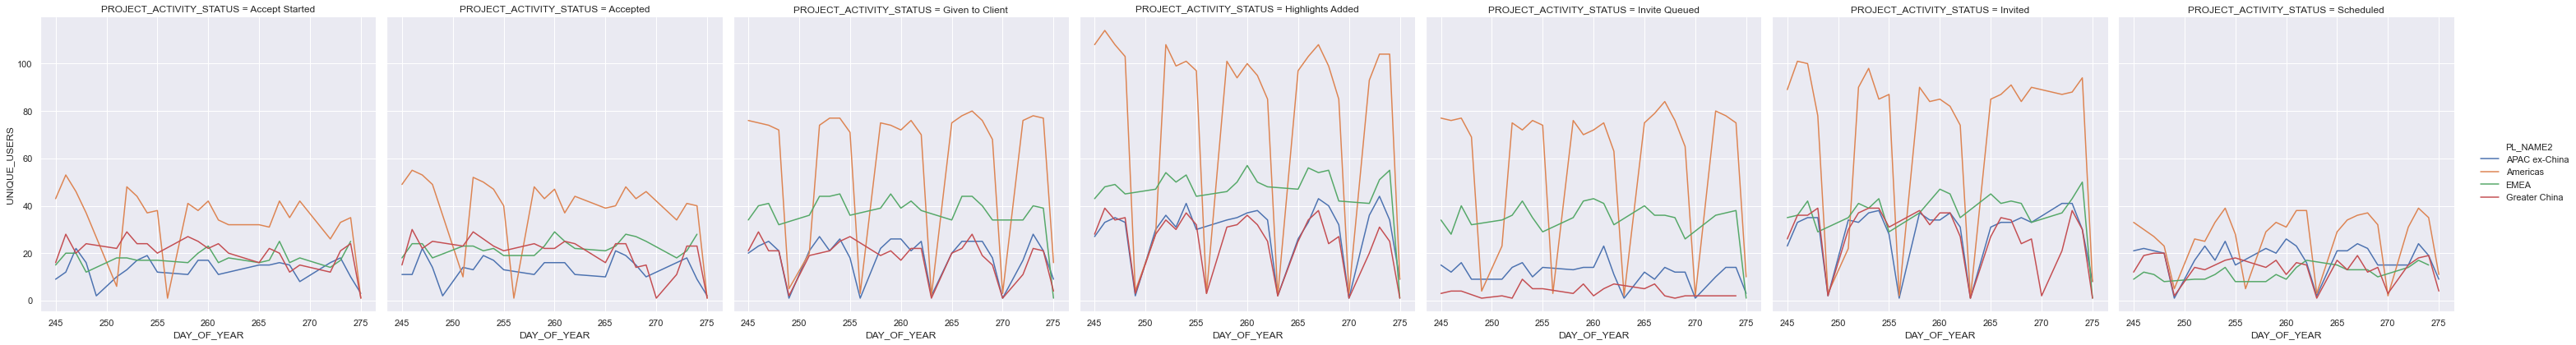

In [8]:
def render(df, title=""):
    sns.set(style="darkgrid")
    
    ax = sns.relplot(x="DAY_OF_YEAR", y="UNIQUE_USERS",
                     col="PROJECT_ACTIVITY_STATUS",
                     hue="PL_NAME2",
                     height=6, aspect=1, facet_kws=dict(sharex=False),
                     kind="line", legend="full", data=df)

render(df_working)

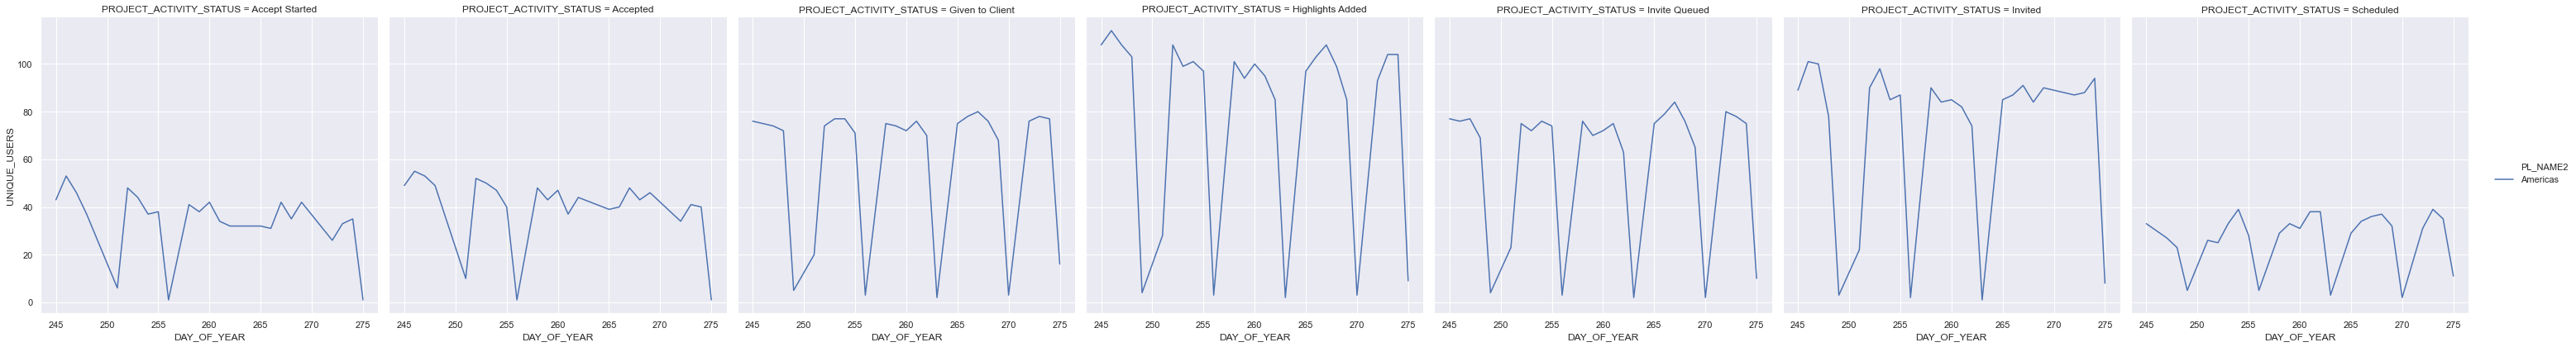

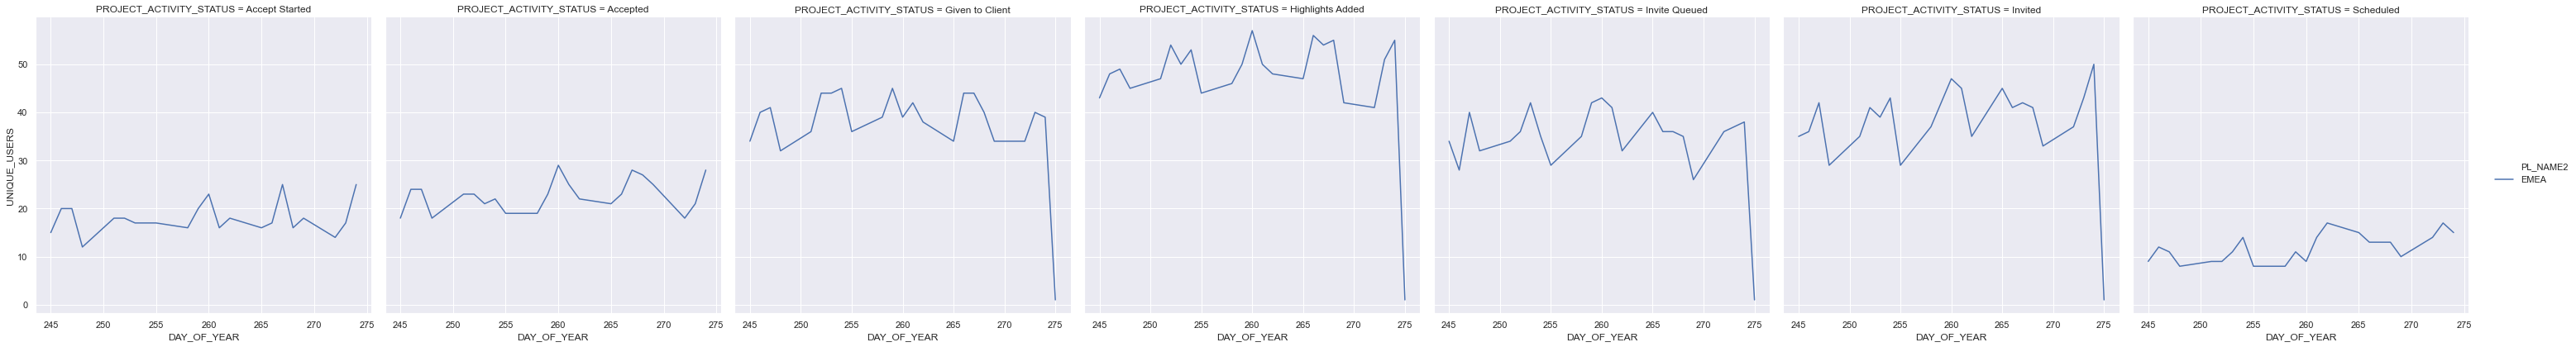

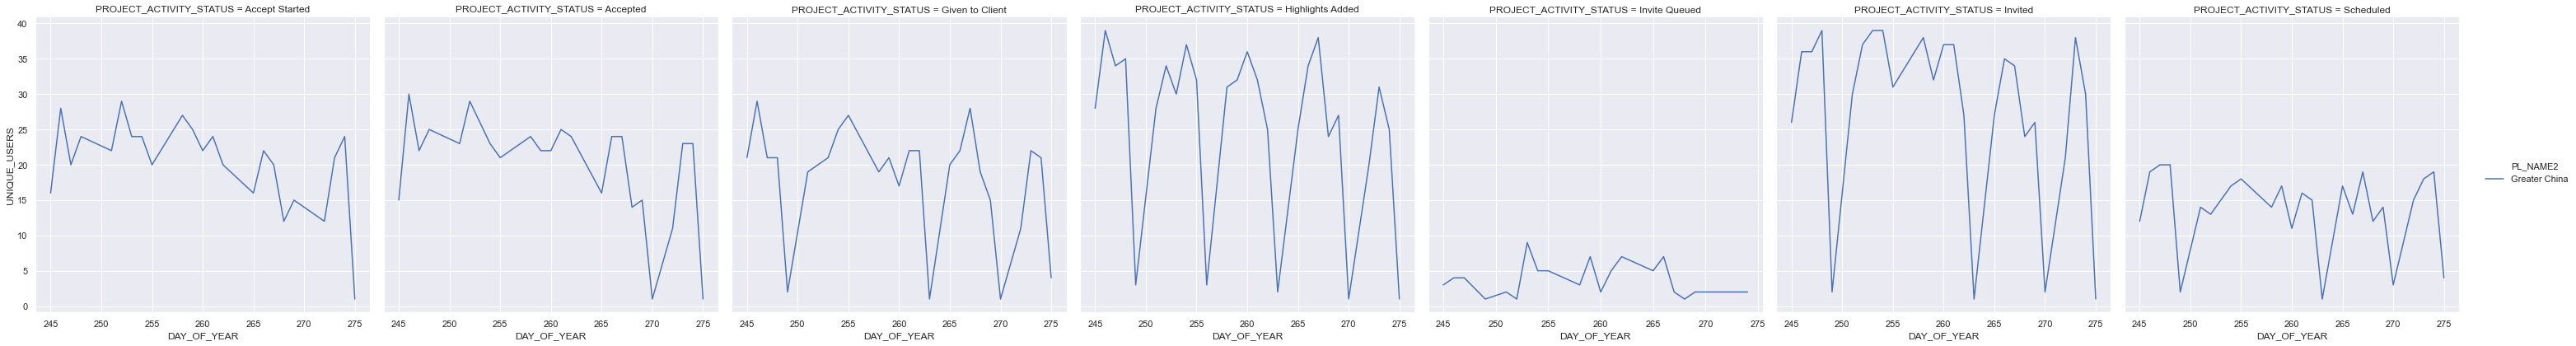

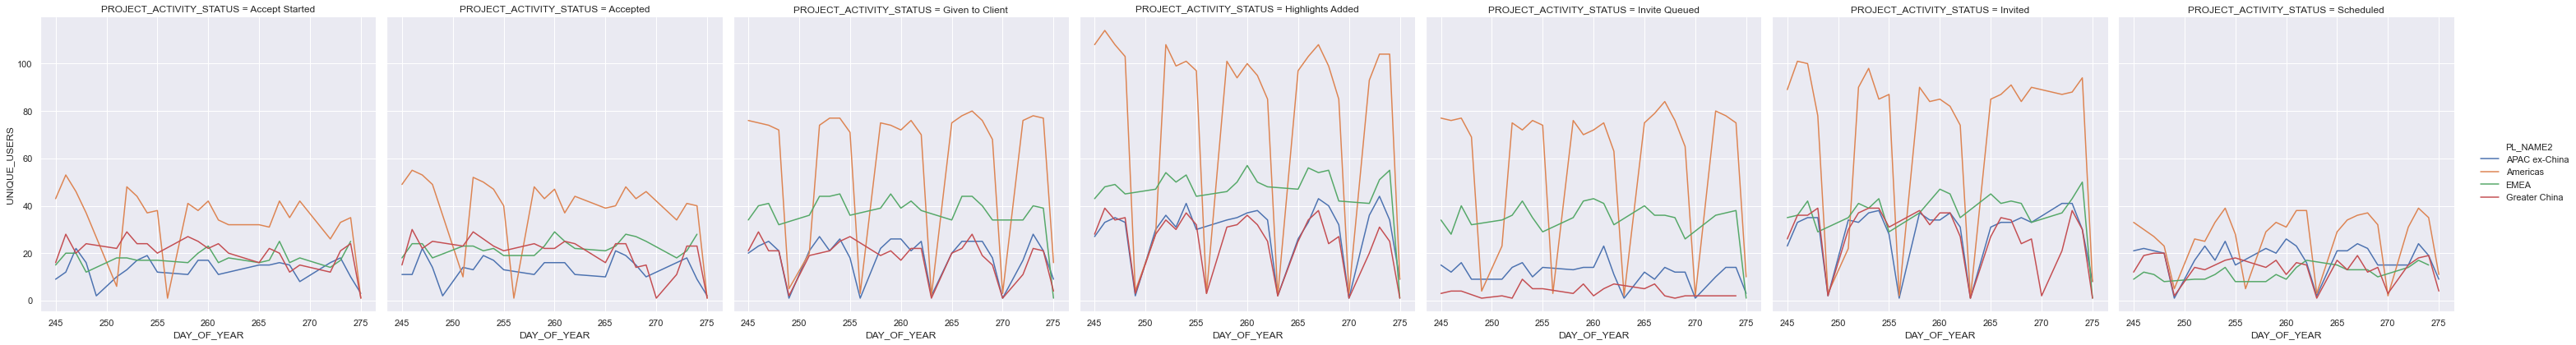

In [9]:
render(shape(df.loc[df.PL_NAME2 == 'Americas']))
render(shape(df.loc[df.PL_NAME2 == 'EMEA']))
render(shape(df.loc[df.PL_NAME2 == 'Greater China']))
render(shape(df))

# Total Global Activity Users

In [10]:
df_population = df

# region filters
#df_population = df_population.loc[df_population.PL_NAME2 == 'Americas']
# df_population = df_population.loc[df_population.REVREC_REGION == 'EMEA']
# df_population = df_population.loc[df_population.REVREC_BU == 'PSF']


# activity filters
df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Accepted', 'Invite Queued', 'Invited', 'Highlights Added', 'Given to Client', 'Accept Started', 'Scheduled'])]
#df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Invite Queued'])]

# date filters
df_population = df_population.loc[df_population.ACTIVITY_YEAR_NUMBER >= 2020]
df_population = df_population.loc[df_population.ACTIVITY_IS_WORK_DAY == 1]

# robot filters
df_population = df_population.loc[~df_population.CREATED_BY.isin([0, 9999])]

# grouped
df_grouped = df_population.groupby(['PL_NAME2','DAY_OF_YEAR'])
df_working = pd.DataFrame(df_grouped['CREATED_BY'].nunique().to_frame())
df_working = pd.DataFrame(df_working.to_records())
print(df_working)
df_working['CREATED_BY_ROLLING'] = df_working['CREATED_BY'].rolling(7).mean()
df_working.tail()

          PL_NAME2  DAY_OF_YEAR  CREATED_BY
0    APAC ex-China          245          48
1    APAC ex-China          246          52
2    APAC ex-China          247          52
3    APAC ex-China          248          55
4    APAC ex-China          249           3
..             ...          ...         ...
99   Greater China          270           4
100  Greater China          272          35
101  Greater China          273          53
102  Greater China          274          44
103  Greater China          275           6

[104 rows x 3 columns]


,PL_NAME2,DAY_OF_YEAR,CREATED_BY,CREATED_BY_ROLLING
99,Greater China,270,4,33.714286
100,Greater China,272,35,38.428571
101,Greater China,273,53,40.000000
102,Greater China,274,44,38.857143
103,Greater China,275,6,32.000000


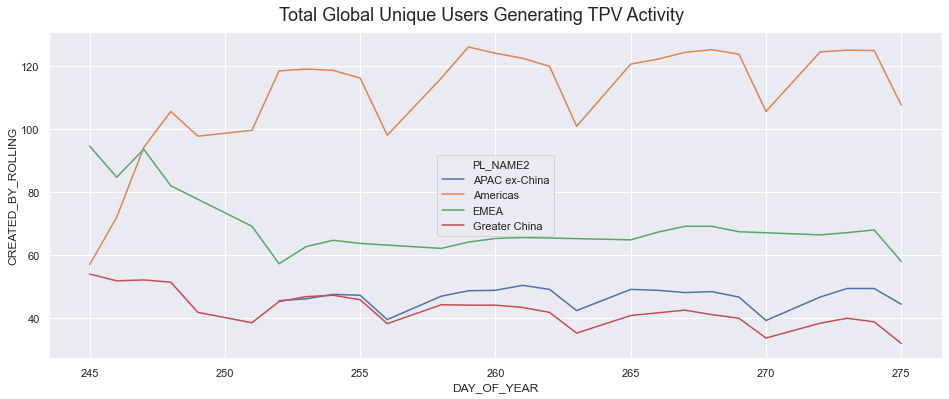

In [11]:
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(16, 6))
f.suptitle('Total Global Unique Users Generating TPV Activity', fontsize="18", y=0.94)
ax = sns.lineplot(x="DAY_OF_YEAR", y="CREATED_BY_ROLLING", hue="PL_NAME2",data=df_working)

# User Activity at Time of Day

In [12]:
df_population = df.copy()

# df_population = df_population.loc[df_population.CREATED_BY.isin([6361, 6360])]
# df_population = df_population.loc[df_population.CREATED_BY.isin([5374])]

# revrec filters
df_population = df_population.loc[df_population.PL_NAME2 == 'Americas']
# df_population = df_population.loc[df_population.REVREC_BU == 'NAFS']
# df_population = df_population.loc[df_population.REVREC_BU == 'Corporate']
# df_population = df_population.loc[df_population.REVREC_BU == 'PSF']

# df_population = df_population.loc[df_population.REVREC_REGION == 'EMEA']
# df_population = df_population.loc[df_population.REVREC_REGION == 'ASIA']

# P&L filters
# df_population = df_population.loc[df_population.PL_NAME == 'Americas Private']
# df_population = df_population.loc[df_population.PL_NAME == 'Americas Public']
# df_population = df_population.loc[df_population.PL_NAME == 'Americas PSF']
# df_population = df_population.loc[df_population.PL_NAME == 'Americas Corporate']
# df_population = df_population.loc[df_population.PL_NAME == 'Americas Credit']

# df_population = df_population.loc[df_population.PL_NAME == 'Greater China'] 

# activity filters
# df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Invite Queued', 'Invited', 'Highlights Added', 'Given to Client', 'Accept Started', 'Scheduled'])]
df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Accepted', 'Invite Queued', 'Invited', 'Highlights Added', 'Given to Client', 'Accept Started', 'Scheduled'])]
# df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Invited', 'Invite Queued'])]
# df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Highlights Added'])]
# df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Added to List'])]
# df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Given to Client'])]

df_population.tail()

,ACTIVITY_YEAR_NUMBER,ACTIVITY_MONTH_NUMBER,ACTIVITY_WORK_DAYS_IN_MONTH,ACTIVITY_WEEK_NUMBER,ACTIVITY_HOUR_NUMBER,ACTIVITY_IS_WORK_DAY,CREATED_DATE,PL_NAME,PL_REGION,PL_NAME2,...,PROJECT_ACTIVITY_STATUS,PROJECT_YEAR_NUMBER,PROJET_MONTH_NUMBER,PROJECT_WORK_DAYS_IN_MONTH,PROJECT_WEEK_NUMBER,PROJECT_HOUR_NUMBER,PROJECT_IS_WORK_DAY,CREATE_DATE,DAY_OF_YEAR,DAY_OF_WEEK
313873,2020,9,22,40,23,1,Sep 30 2020 11:59PM,Americas Growth,Americas,Americas,...,Accepted,2020,8,21,36,18,1,Aug 31 2020 6:08PM,274,2
313874,2020,9,22,40,23,1,Sep 30 2020 11:59PM,Americas Growth,Americas,Americas,...,Accepted,2020,9,22,40,18,1,Sep 30 2020 6:56PM,274,2
313875,2020,9,22,40,23,1,Sep 30 2020 11:59PM,Americas Private,Americas,Americas,...,Accept Started,2020,9,22,40,16,1,Sep 30 2020 4:12PM,274,2
313876,2020,9,22,40,23,1,Sep 30 2020 11:59PM,Americas Private,Americas,Americas,...,Scheduled,2020,9,22,40,14,1,Sep 30 2020 2:04PM,274,2
313877,2020,9,22,40,23,1,Sep 30 2020 11:59PM,Americas Private,Americas,Americas,...,Invite Queued,2020,9,22,40,23,1,Sep 30 2020 11:51PM,274,2


In [84]:
def shape_hourly_box(df):
    # robot filters
    df_working = df.loc[~df_population.CREATED_BY.isin([0, 9999])]
    df_working = df_working.loc[df_population.ACTIVITY_IS_WORK_DAY == 1]    

    # grouped
    df_grouped = df_working.groupby(['ACTIVITY_YEAR_NUMBER', 'DAY_OF_YEAR', 'ACTIVITY_HOUR_NUMBER','PL_NAME2'])
    df_working = pd.DataFrame(df_grouped['CREATED_BY'].nunique().to_frame())
    df_working['ACTIVITY_COUNT'] = df_grouped['ACTIVITY_HOUR_NUMBER'].count().to_frame()['ACTIVITY_HOUR_NUMBER']
    df_working = pd.DataFrame(df_working.to_records())
    df_working['ACTIVITY_PER_USER'] = df_working['ACTIVITY_COUNT'] / df_working['CREATED_BY']
    return df_working

# date filters
df_working = df_population.loc[df_population.ACTIVITY_YEAR_NUMBER >= 2020]
# df_working = df_working.loc[df_working.ACTIVITY_MONTH_NUMBER.isin([9])]
df_working = df_working.loc[df_working.ACTIVITY_MONTH_NUMBER == 9]
df_working = shape_hourly_box(df_working)
df_working.tail()

,ACTIVITY_YEAR_NUMBER,DAY_OF_YEAR,ACTIVITY_HOUR_NUMBER,PL_NAME2,CREATED_BY,ACTIVITY_COUNT,ACTIVITY_PER_USER
1749,2020,275,2,Greater China,2,4,2.000000
1750,2020,275,3,APAC ex-China,16,30,1.875000
1751,2020,275,3,Americas,3,11,3.666667
1752,2020,275,3,EMEA,1,1,1.000000
1753,2020,275,3,Greater China,4,14,3.500000


In [14]:
def offset_hours(df, utc_offset):
    # Adjust offset to CST
    df_adjusted = df.copy()
    df_adjusted['ACTIVITY_HOUR_NUMBER'] = df_adjusted['ACTIVITY_HOUR_NUMBER'] + utc_offset
    df_adjusted.loc[df_adjusted['ACTIVITY_HOUR_NUMBER'] < 0, 'ACTIVITY_HOUR_NUMBER'] = df_adjusted['ACTIVITY_HOUR_NUMBER'] + 24
    df_adjusted.loc[df_adjusted['ACTIVITY_HOUR_NUMBER'] > 23, 'ACTIVITY_HOUR_NUMBER'] = df_adjusted['ACTIVITY_HOUR_NUMBER'] - 24
    df_adjusted['ACTIVITY_HOUR_NUMBER'].unique()
    return df_adjusted

df_adjusted = offset_hours(df_working, -6)
# df_adjusted = offset_hours(df_working, 7)
df_adjusted['ACTIVITY_HOUR_NUMBER'].unique()

array([22, 23,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21,  0,  2])

In [15]:
def render_hourly_box(df, field, title, offset=0, ylabel=''):    
    # set up plot options
    color_black_primary = (0.0, 0.0, 0.0, 0.87)
    color_black_secondary = (0.0, 0.0, 0.0, 0.7)
    
    f, ax = plt.subplots(figsize=(22, 9))
    f.suptitle(title, 
               fontsize="24", 
               y=0.94,
               color=color_black_primary)

    # plot it!
    ax_1 = sns.boxplot(x="ACTIVITY_HOUR_NUMBER", 
                       y=field,
                       width=.9,
                       linewidth=1.3,
                       fliersize=1.75,
                       ax=ax,
                       palette=sns.cubehelix_palette(7),
               data=df)

    # set xlabel
    if (offset == 0):
        ax_1.set(xlabel='Hour of Day (UTC±00:00)')
    if (offset > 0):
        ax_1.set(xlabel='Hour of Day (UTC+{:02}:00)'.format(offset)) 
    if (offset < 0):
        ax_1.set(xlabel='Hour of Day (UTC-{:02}:00)'.format(abs(offset))) 
        
    # set ylabel
    if (ylabel != ''):
        ax_1.set(ylabel=ylabel)  
        
    # clean up x and y axis
    ax_1.xaxis.set_label_coords(0.5, -0.1) 
    ax_1.yaxis.set_label_coords(-0.044, 0.5)
    ax_1.xaxis.label.set_color(color_black_primary) 
    ax_1.yaxis.label.set_color(color_black_primary)
    ax_1.tick_params(colors=color_black_primary)


#render_hourly_box(df_adjusted, "CREATED_BY", "Employees Generating TPV Activity (Invites, Phone Accepts, Highlights, GTC)", offset=-6, ylabel='Active Employees')

# Houry TPV Activities for Americas Private

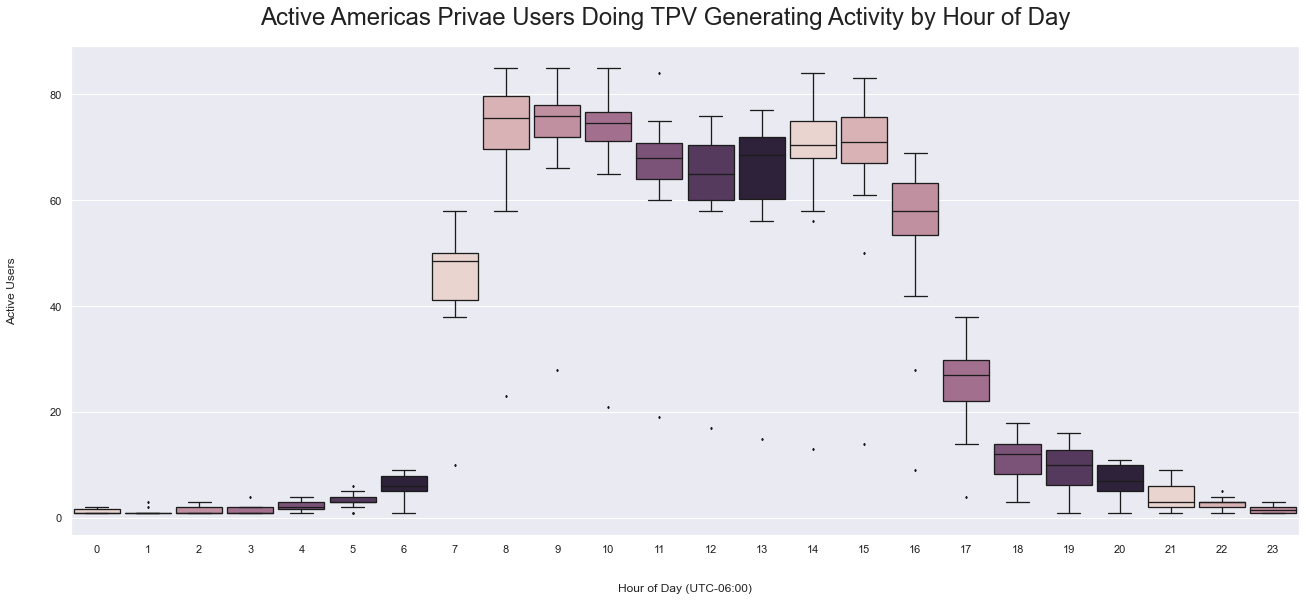

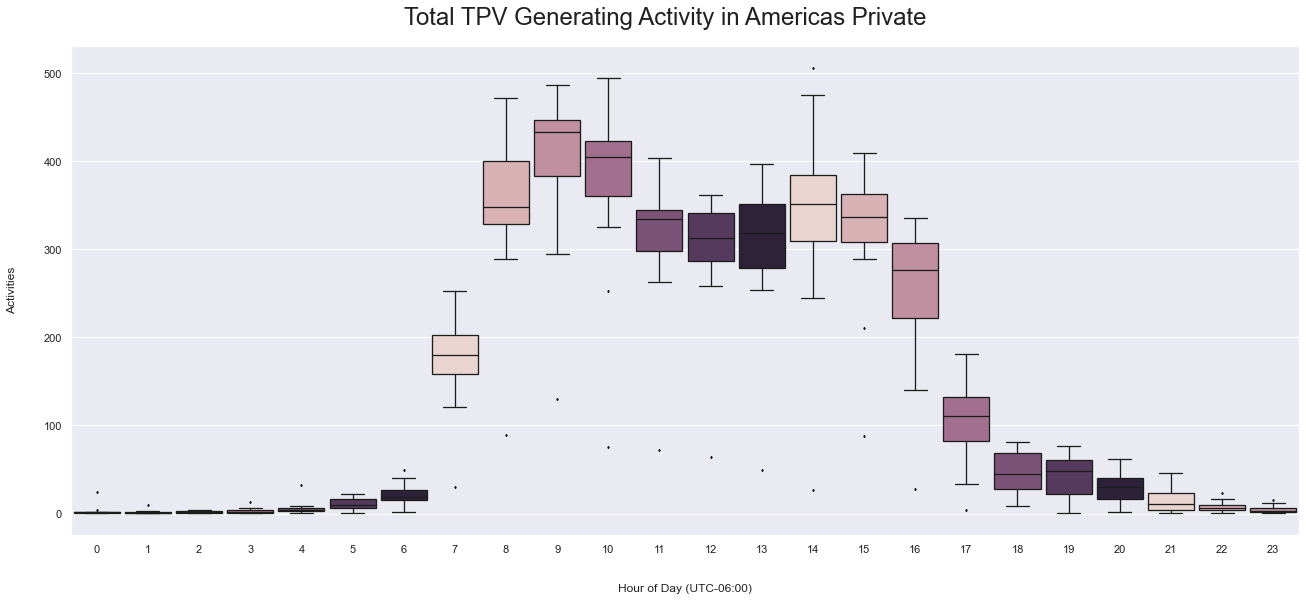

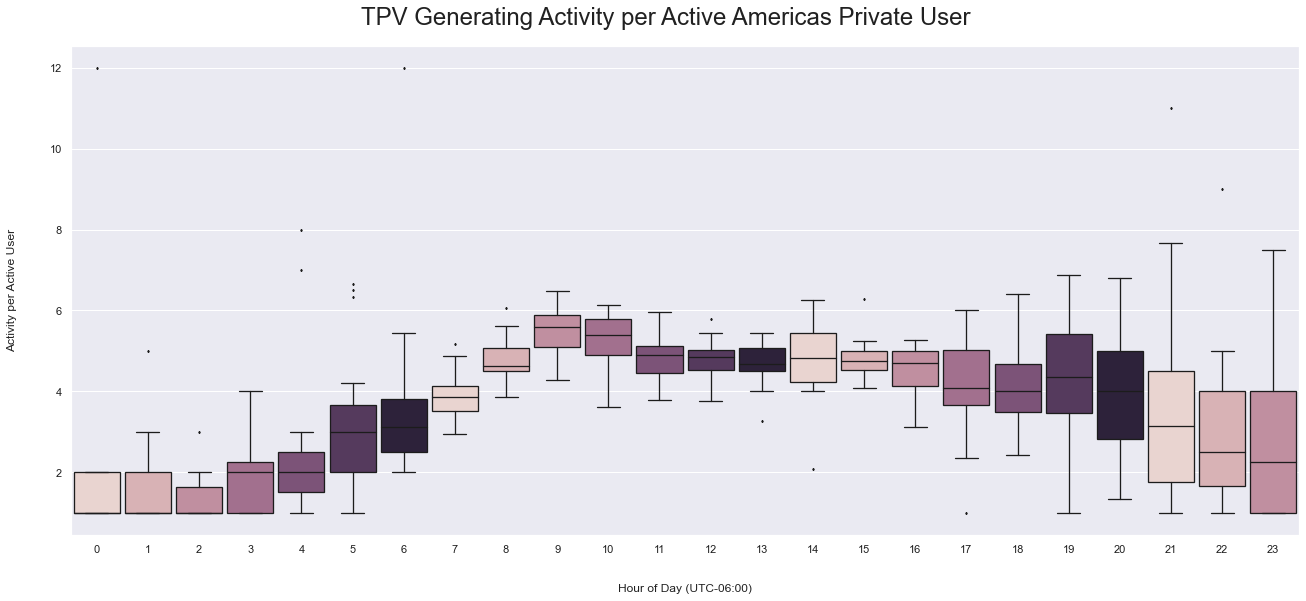

In [16]:
render_hourly_box(df_adjusted, "CREATED_BY", "Active Americas Privae Users Doing TPV Generating Activity by Hour of Day", offset=-6, ylabel='Active Users')
render_hourly_box(df_adjusted, "ACTIVITY_COUNT", "Total TPV Generating Activity in Americas Private", offset=-6, ylabel='Activities')
render_hourly_box(df_adjusted, "ACTIVITY_PER_USER", "TPV Generating Activity per Active Americas Private User", offset=-6, ylabel='Activity per Active User')

# ACS Private Invites by Hour

In [17]:
df_population = df

# region filters
df_population = df_population.loc[df_population.PL_NAME2 == 'Americas']
df_population = df_population.loc[df_population.PL_NAME == 'Americas Private']

# activity filters
df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Invited'])]
# df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Invited', 'Invite Queued'])]
# df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Highlights Added'])]
# df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Scheduled'])]
# df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Given to Client'])]

# date filters
df_population = df_population.loc[df_population.ACTIVITY_YEAR_NUMBER >= 2020]
df_population = df_population.loc[df_population.ACTIVITY_MONTH_NUMBER < 11]
df_population = df_population.loc[df_population.ACTIVITY_IS_WORK_DAY == 1]    
df_working = shape_hourly_box(df_population)
df_working.tail()

,ACTIVITY_YEAR_NUMBER,DAY_OF_YEAR,ACTIVITY_HOUR_NUMBER,PL_NAME2,CREATED_BY,ACTIVITY_COUNT,ACTIVITY_PER_USER
317,2020,274,22,Americas,10,24,2.4
318,2020,274,23,Americas,3,6,2.0
319,2020,275,0,Americas,2,2,1.0
320,2020,275,1,Americas,2,12,6.0
321,2020,275,2,Americas,1,1,1.0


In [18]:
df_adjusted = offset_hours(df_working, -6)

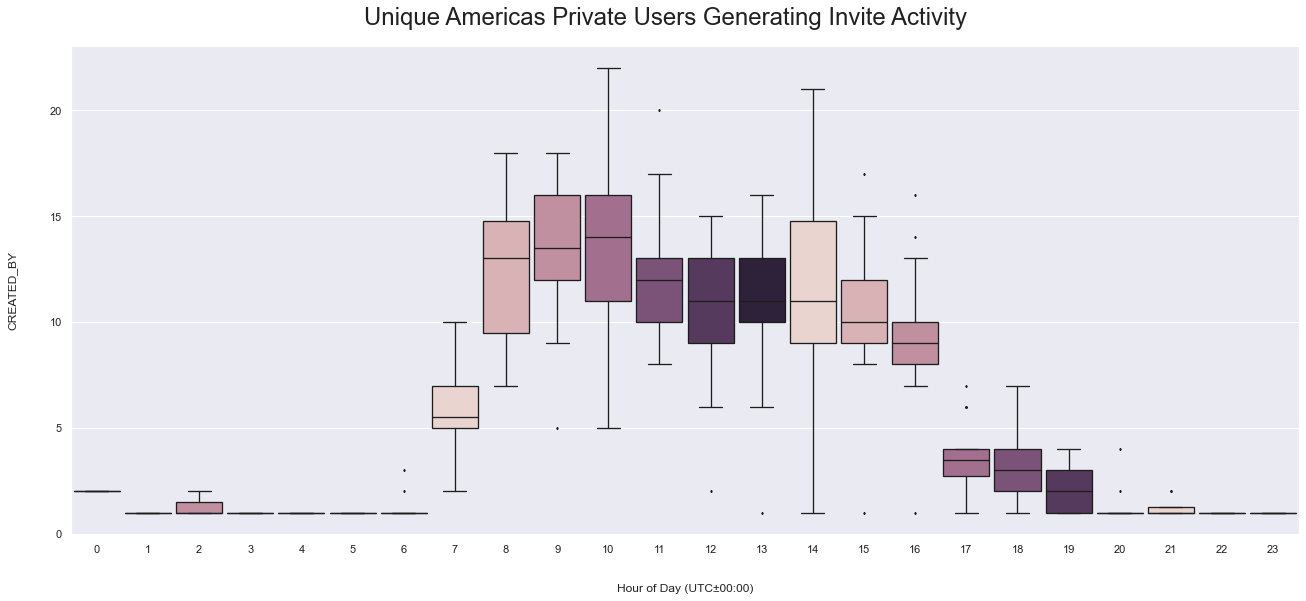

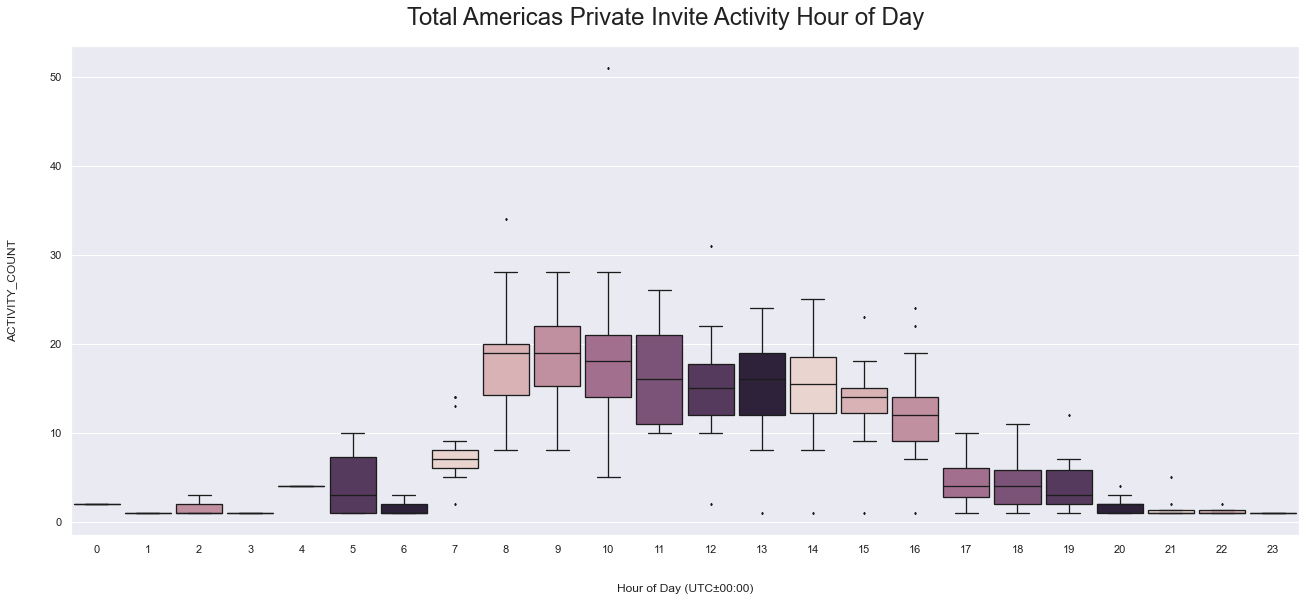

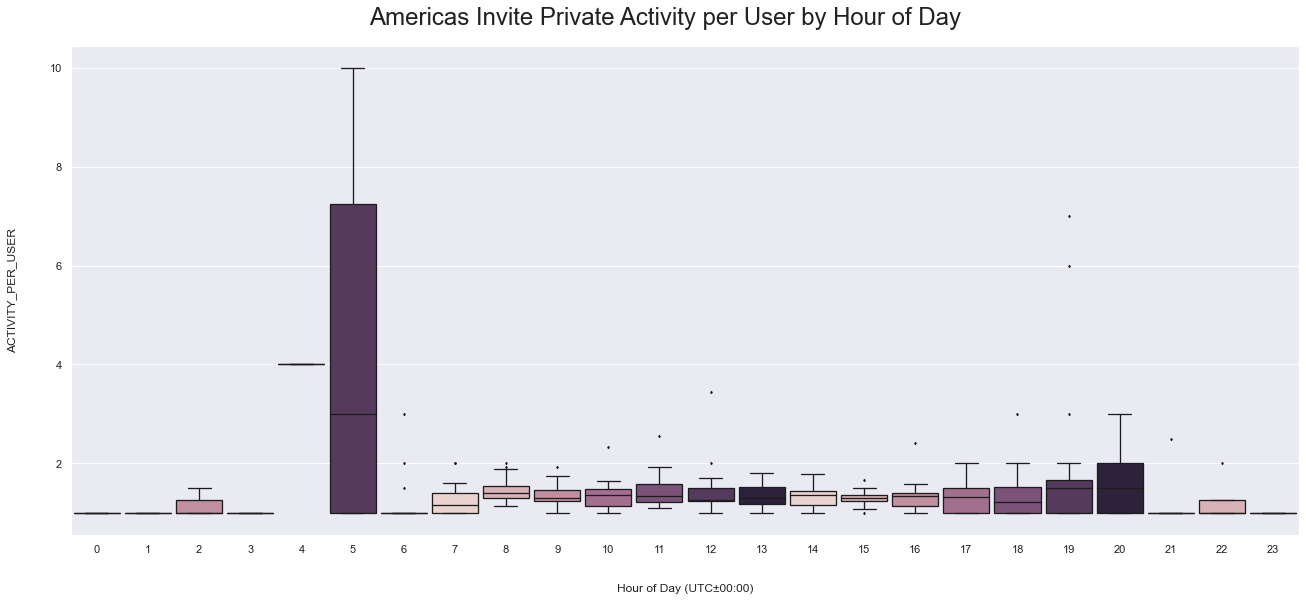

In [19]:
render_hourly_box(df_adjusted, "CREATED_BY", "Unique Americas Private Users Generating Invite Activity")
render_hourly_box(df_adjusted, "ACTIVITY_COUNT", "Total Americas Private Invite Activity Hour of Day")
render_hourly_box(df_adjusted, "ACTIVITY_PER_USER", "Americas Invite Private Activity per User by Hour of Day")

# Houry TPV Activities for Greater China

In [20]:
df_population = df

# region filters
df_population = df_population.loc[df_population.PL_NAME2 == 'Greater China']

# activity filters
df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Accepted','Invite Queued', 'Invited', 'Highlights Added', 'Given to Client', 'Accept Started', 'Scheduled'])]

# date filters
df_population = df_population.loc[df_population.ACTIVITY_YEAR_NUMBER >= 2020]
df_population = df_population.loc[df_population.ACTIVITY_MONTH_NUMBER < 11]
df_population = df_population.loc[df_population.ACTIVITY_IS_WORK_DAY == 1]    

df_population = offset_hours(shape_hourly_box(df_population), 7)

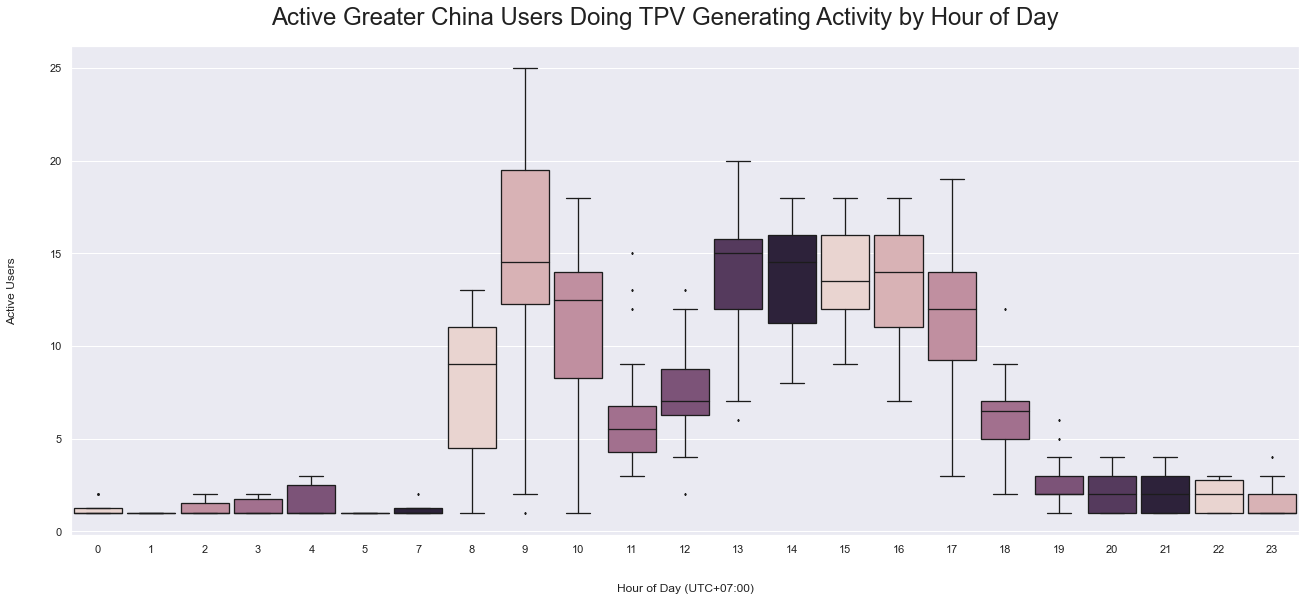

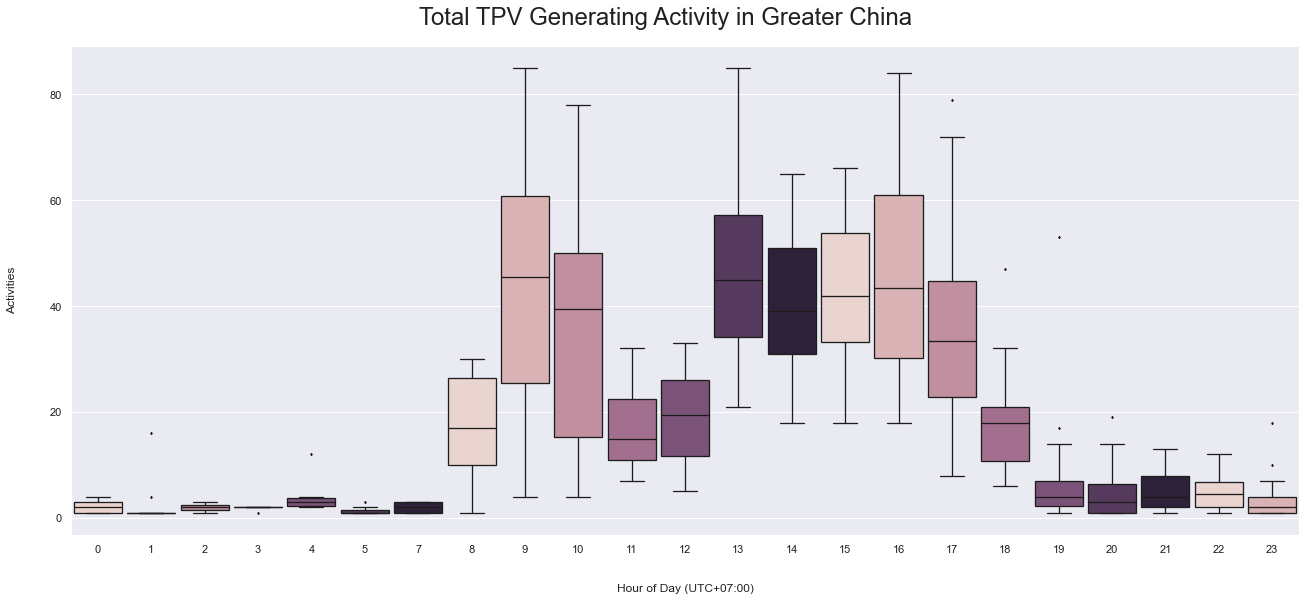

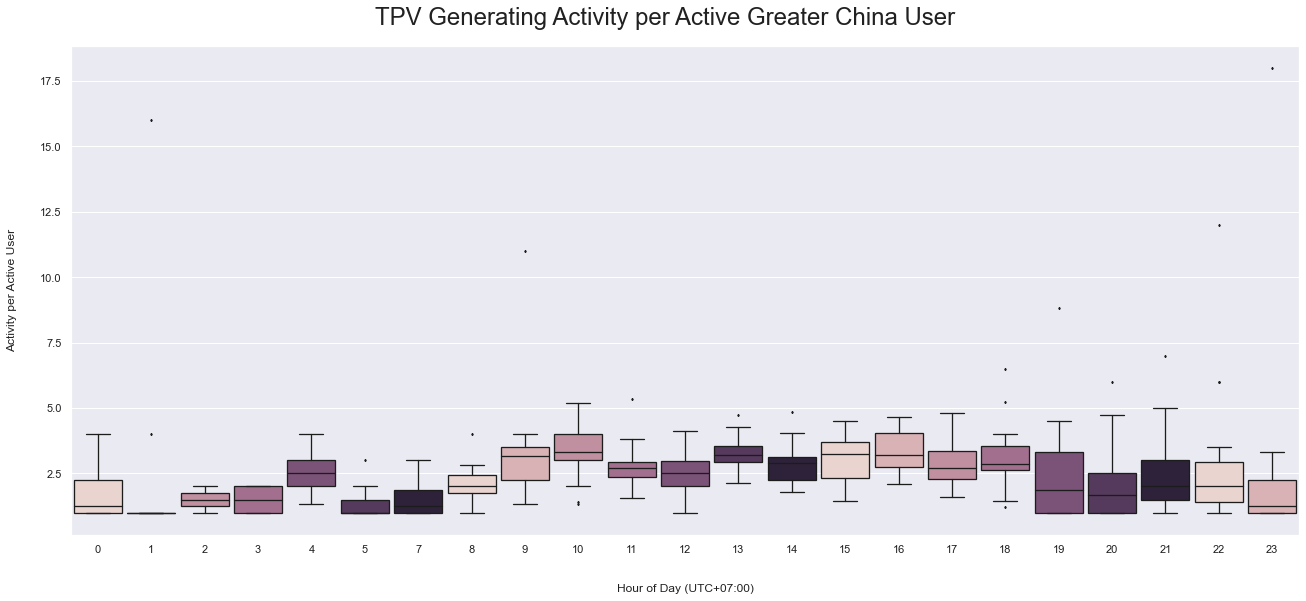

In [21]:
render_hourly_box(df_population, "CREATED_BY", "Active Greater China Users Doing TPV Generating Activity by Hour of Day", offset=7, ylabel='Active Users')
render_hourly_box(df_population, "ACTIVITY_COUNT", "Total TPV Generating Activity in Greater China", offset=7, ylabel='Activities')
render_hourly_box(df_population, "ACTIVITY_PER_USER", "TPV Generating Activity per Active Greater China User", offset=7, ylabel='Activity per Active User')

# Houry TPV Activities for EMEA

In [22]:
df_population = df.copy()

# region filters
df_population = df_population.loc[df_population.PL_NAME2 == 'EMEA']

# activity filters
df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Accepted','Invite Queued', 'Invited', 'Highlights Added', 'Given to Client', 'Accept Started', 'Scheduled'])]

# date filters
df_population = df_population.loc[df_population.ACTIVITY_YEAR_NUMBER >= 2020]
df_population = df_population.loc[df_population.ACTIVITY_MONTH_NUMBER < 11]
df_population = df_population.loc[df_population.ACTIVITY_IS_WORK_DAY == 1]    
df_population.head()

df_population = shape_hourly_box(df_population)

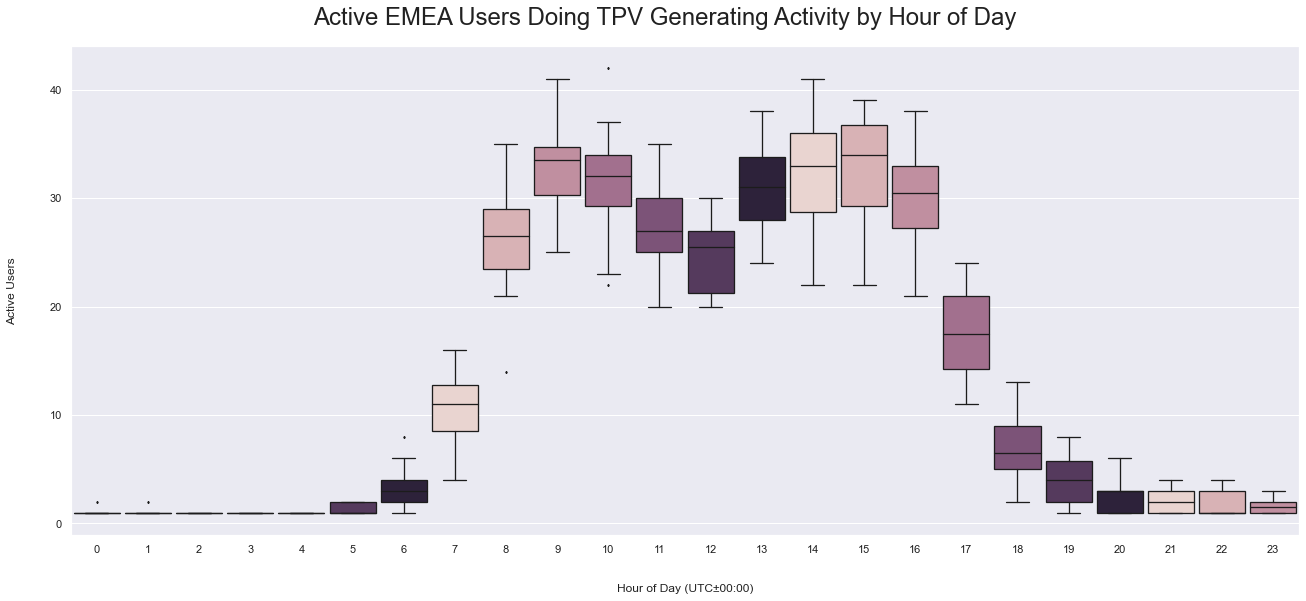

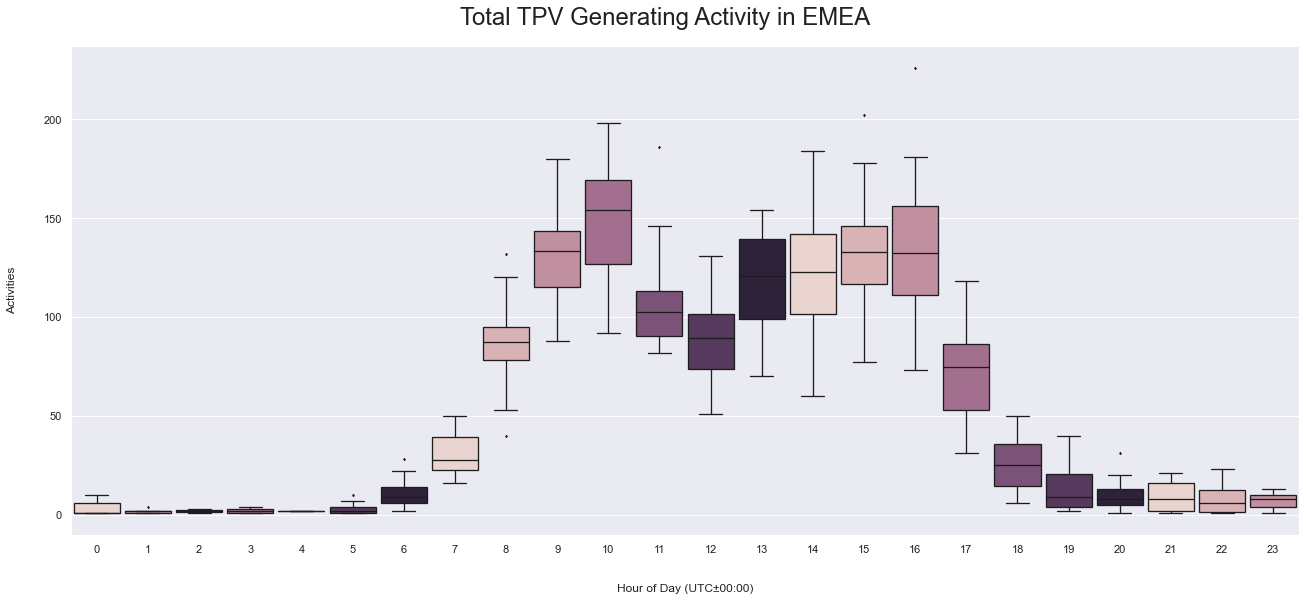

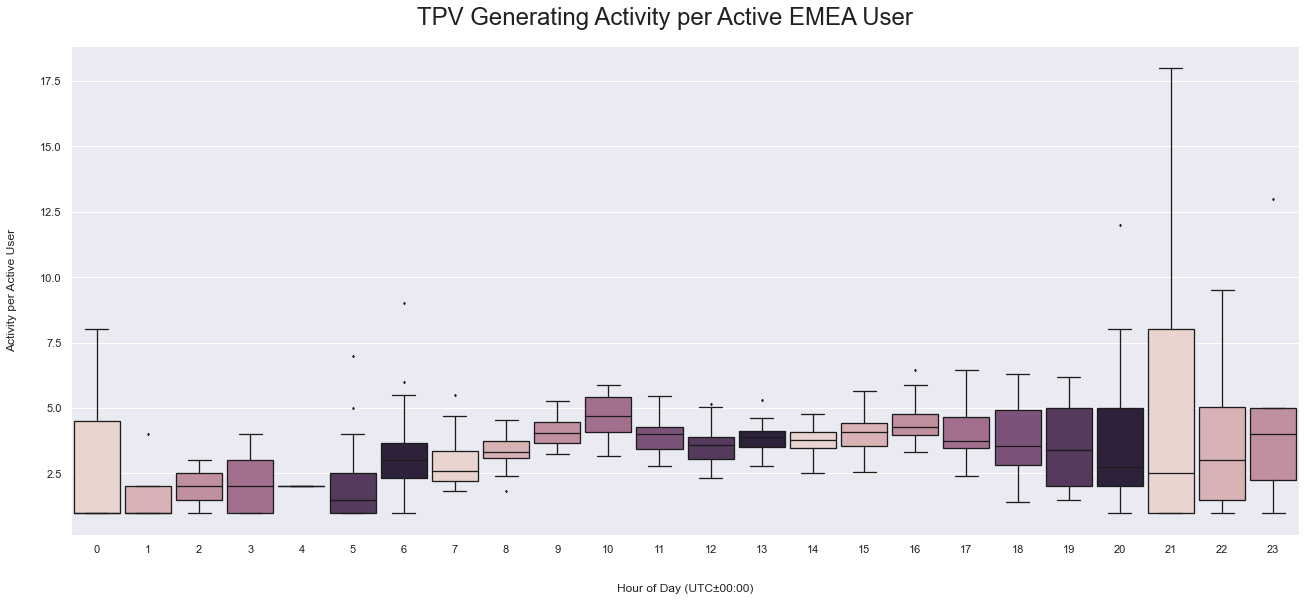

In [23]:
render_hourly_box(df_population, "CREATED_BY", "Active EMEA Users Doing TPV Generating Activity by Hour of Day", offset=0, ylabel='Active Users')
render_hourly_box(df_population, "ACTIVITY_COUNT", "Total TPV Generating Activity in EMEA", offset=0, ylabel='Activities')
render_hourly_box(df_population, "ACTIVITY_PER_USER", "TPV Generating Activity per Active EMEA User", offset=0, ylabel='Activity per Active User')

In [94]:
df_population = df
df_population= df_population.loc[df_population.ACTIVITY_YEAR_NUMBER >= 2020]
df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Accepted', 'Invite Queued', 'Invited', 'Highlights Added', 'Given to Client', 'Accept Started', 'Scheduled'])]
df_working = df.loc[~df_population.CREATED_BY.isin([0, 9999])]
df_working = df_working.loc[df_population.ACTIVITY_IS_WORK_DAY == 1]    
df_grouped = df_working.groupby(['ACTIVITY_YEAR_NUMBER', 'DAY_OF_YEAR', 'ACTIVITY_HOUR_NUMBER','PL_NAME2'])
df_working = pd.DataFrame(df_grouped['CREATED_BY'].nunique().to_frame())
df_working['ACTIVITY_COUNT'] = df_grouped['ACTIVITY_HOUR_NUMBER'].count().to_frame()['ACTIVITY_HOUR_NUMBER']
df_working = pd.DataFrame(df_working.to_records())
df_grouped = df_working.groupby(['PL_NAME2','DAY_OF_YEAR'])
df_working = df_grouped[['ACTIVITY_COUNT','CREATED_BY']].sum()
df_working = pd.DataFrame(df_working.to_records())
df_working['ACTIVITY_PER_USER'] = df_working['ACTIVITY_COUNT'] / df_working['CREATED_BY']
df_working['ACTIVITY_PER_USER_BY_ROLLING'] = df_working['ACTIVITY_PER_USER'].rolling(7).mean()
df_working.tail()

,PL_NAME2,DAY_OF_YEAR,ACTIVITY_COUNT,CREATED_BY,ACTIVITY_PER_USER,ACTIVITY_PER_USER_BY_ROLLING
99,Greater China,270,9,6,1.500000,2.827117
100,Greater China,272,222,79,2.810127,2.657135
101,Greater China,273,353,133,2.654135,2.613498
102,Greater China,274,287,120,2.391667,2.469451
103,Greater China,275,18,6,3.000000,2.478974


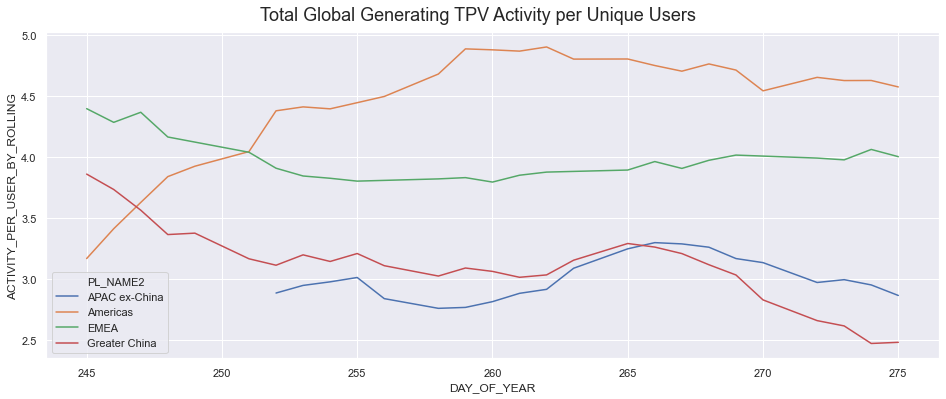

In [93]:
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(16, 6))
f.suptitle('Total Global Generating TPV Activity per Unique Users', fontsize="18", y=0.94)
ax = sns.lineplot(x="DAY_OF_YEAR", y="ACTIVITY_PER_USER_BY_ROLLING", hue="PL_NAME2",data=df_working,ci=None)